In [1]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics, pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score


from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from time import time
# models
from sklearn.linear_model import LogisticRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Visualization

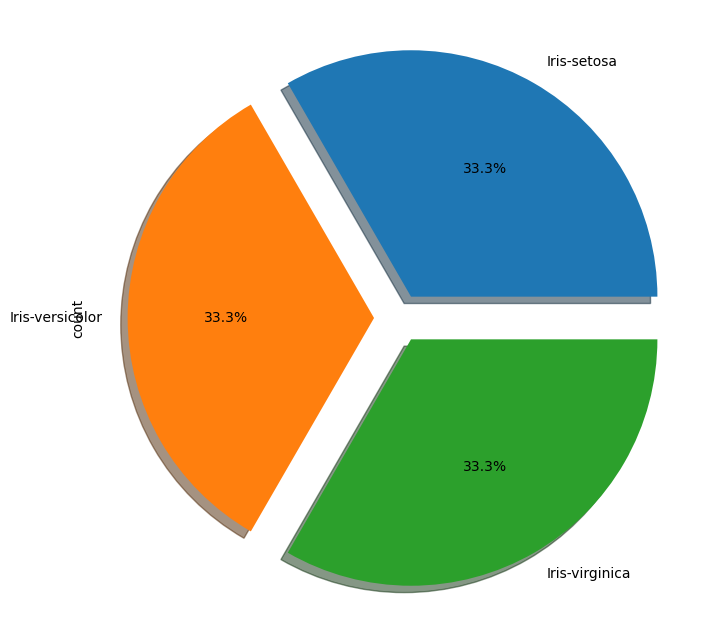

In [3]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

The **`.value_counts()`** function calculates the frequency of each unique value in the 'Species' column of the Iris dataset. It returns a **Series object** with the counts of each species.<br>
The **`.plot.pie()`** function is a method chaining that spesifies the type of plot to create which is a pie chart in this case. It takes several parameters to customize the appearance of the pie chart.<br>
* **explode=[0.1,0.1,0.1]:** This parameter controls the "explode" effect, which is used to separate a slice from the rest of the pie. The values in the list indicate the fraction of the radius with which to offset each wedge. Here, all slices are slightly exploded for better visibility.<br>
* **autopct='%1.1f%%':** This parameter controls the format of the autopct labels, which are the percentages displayed on each wedge. '%1.1f%%' formats the percentage with one decimal place.<br>
* **shadow=True:** This parameter adds a shadow effect to the pie chart, making it visually more appealing and easier to distinguish the slices.<br>
* **figsize=(10,8):** This parameter sets the size of the figure (width, height) in inches. It controls the overall size of the pie chart.<br>
* **plt.show():** This function displays the pie chart. It's a part of the matplotlib library and is used to show the plot on the screen.

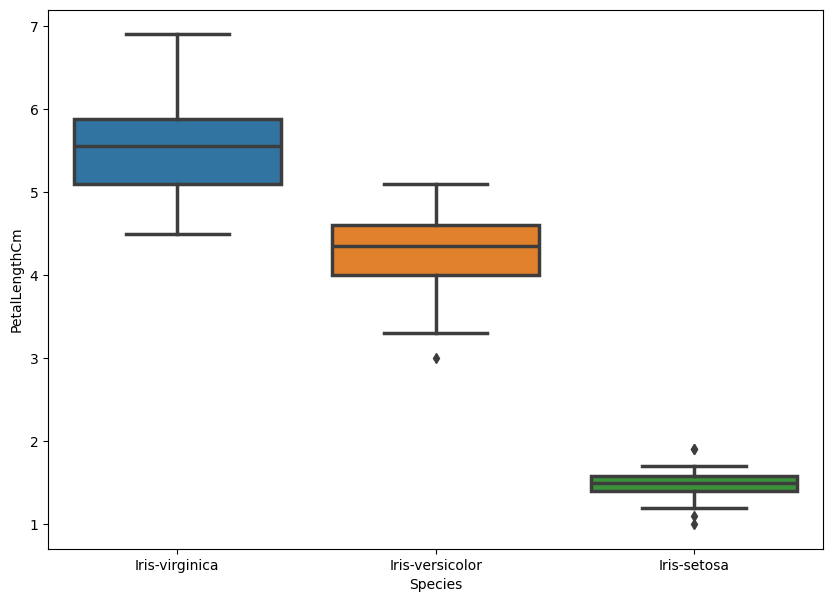

In [4]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=iris,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

We have created a **`Box Plot`** where **'Species'** column is on **x-axis** and **'PetalLengthCm'** column is on **y-axis**. We have also specified the order of the species categories should appear on the x-axis as **['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']**. The orientation is specified to be vertical and **'doge=False'** represents there should be no seperation between the plots.

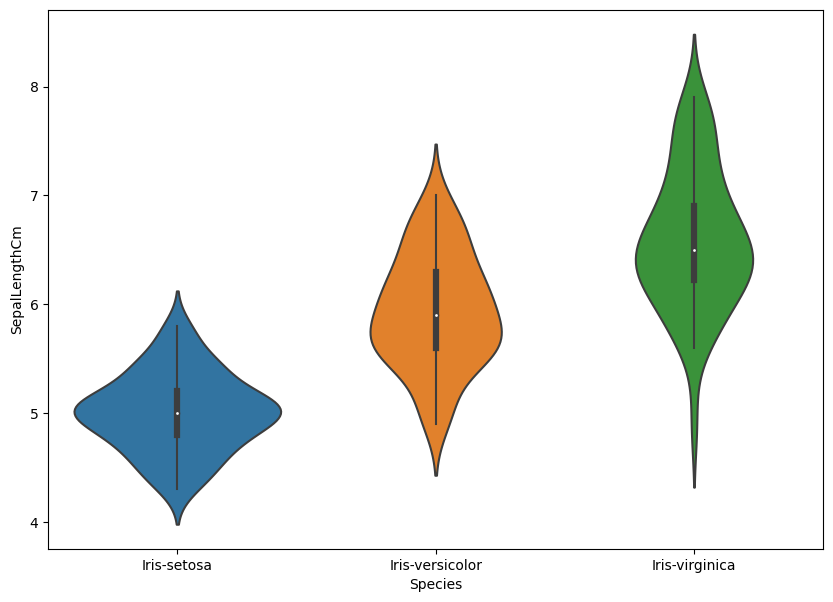

In [5]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.violinplot(x='Species',y='SepalLengthCm',data=iris)

Here we have created a **`Violin Plot`** which is a combination of a box plot and a kernel density plot, showing the distribution of the 'SepalLengthCm' feature across different species of iris flowers in the Iris dataset. This plot visually compares the **distribution of sepal lengths** across different species of iris flowers. The width of each violin represents the **density of data points** at that particular sepal length, with broader sections indicating higher density, and the **central line** representing the **median sepal length** for each species.

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

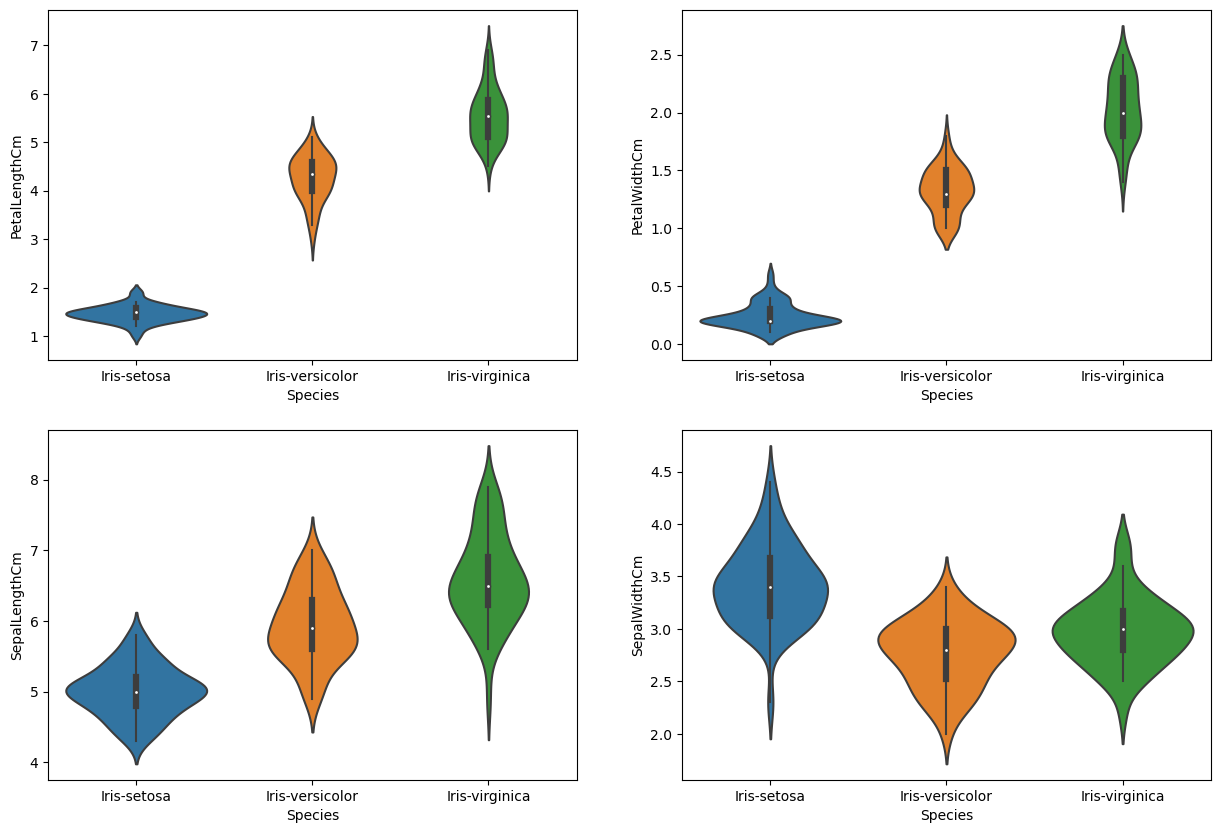

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

Now we have plotted 4 different violin plot in which the 'Species' column is on x-axis and it is plotted with **petal length, petal width, sepal length** and **sepal width**.

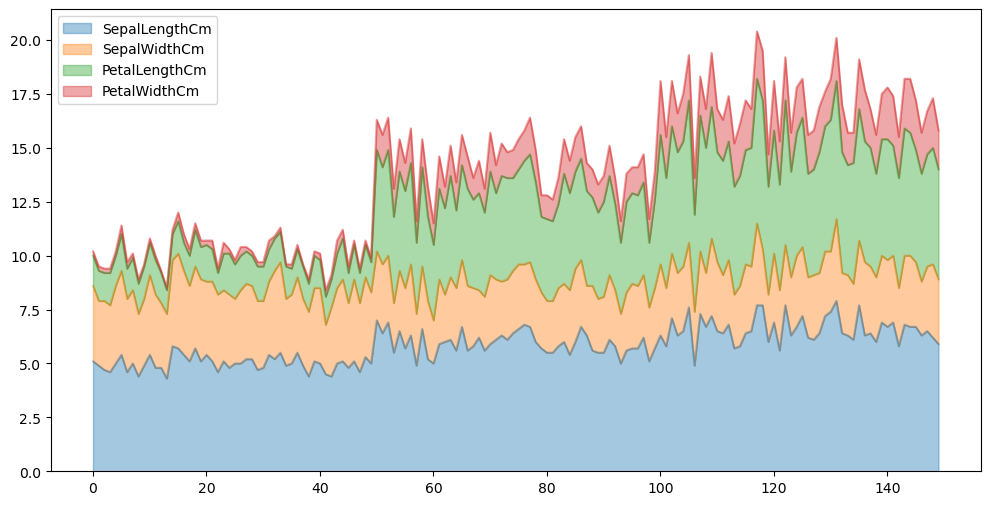

In [7]:
iris.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

Here we have created an **Area Plot**, it visualizes the data as a series of filled areas between 0 and the curve. The **petal length, petal width, sepal length** and **sepal width** are plotted on y-axis and **Species** on x-axis. An **alpha** value of **0.4** makes the areas slightly **transparent**, allowing you to see **overlapping areas** more clearly.

In [8]:
def acc_summary(pipeline, X_train, y_train, X_val, y_val):
    t0 = time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_val)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_val, y_pred)*100
    print("accuracy : {0:.2f}%".format(accuracy))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

The training data is send to a pipeline which will train our classification models and then it will predict the values for validation dataset also we are measuring the time taken in these proccess of training and prediction. And then we are measuring the accuracy for each model.

In [9]:
names = [ 
        'Logistic Regression',
        'Perceptron',
        'Ridge Classifier',
        'SGD Classifier',
        'SVC',
        'Gradient Boosting Classifier', 
        'Extra Trees Classifier', 
        "Bagging Classifier",
        "AdaBoost Classifier", 
        "K Nearest Neighbour Classifier",
         "Decison Tree Classifier",
         "Random Forest Classifier",
         'GaussianNB',
        "Gaussian Process Classifier",
        "MLP Classifier",
        "LGBM Classifier"
         ]
classifiers = [
    LogisticRegression(),
    Perceptron(),
    RidgeClassifier(),
    SGDClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    ExtraTreesClassifier(), 
    BaggingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    GaussianProcessClassifier(),
    MLPClassifier(),
    LGBMClassifier()
        ]

zipped_clf = zip(names,classifiers)

Here we have defined a list that contains all the classification models we are going to use and then zipped as a list of tuples in which each tuple is **(name_of_model, model_instance)**.

In [10]:
def classifier_comparator(X_train,y_train,X_val,y_val,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        #print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline,X_train, y_train, X_val, y_val)
        result.append((n,clf_acc,tt_time))
    return result

This function evaluates and compares the performance of differnt classification models, helping to identify the most suitable model for a given classification task. Every model is passed thorugh the pipeline and their loss is calculated and appended as a tuple to the result list as **(n, accuracy, time_taken)** for each model.

In [11]:
X_train,X_val,y_train,y_val=train_test_split(iris.iloc[:,:-1],iris.iloc[:,-1],test_size=0.1,random_state=2)

**Random State :-** used to set a seed value for the random number generator. This ensures that the split of the dataset into training and validation sets is reproducible. When random_state is set to a specific integer value (e.g., random_state=2), the data will always be split in the same way if the same random_state value is used in the future. This can be helpful for debugging, testing, and ensuring that your results are consistent across different runs of the code.

In [12]:
classifier_comparator(X_train,y_train,X_val,y_val)

Validation result for Logistic Regression
accuracy : 100.00%
train and test time: 0.01s
--------------------------------------------------------------------------------
Validation result for Perceptron
accuracy : 66.67%
train and test time: 0.00s
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
accuracy : 86.67%
train and test time: 0.00s
--------------------------------------------------------------------------------
Validation result for SGD Classifier
accuracy : 93.33%
train and test time: 0.00s
--------------------------------------------------------------------------------
Validation result for SVC
accuracy : 93.33%
train and test time: 0.00s
--------------------------------------------------------------------------------
Validation result for Gradient Boosting Classifier
accuracy : 100.00%
train and test time: 0.08s
--------------------------------------------------------------------------------
Validation res

[('Logistic Regression', 100.0, 0.00813150405883789),
 ('Perceptron', 66.66666666666666, 0.003002166748046875),
 ('Ridge Classifier', 86.66666666666667, 0.002192258834838867),
 ('SGD Classifier', 93.33333333333333, 0.0019876956939697266),
 ('SVC', 93.33333333333333, 0.0009996891021728516),
 ('Gradient Boosting Classifier', 100.0, 0.08465886116027832),
 ('Extra Trees Classifier', 100.0, 0.049156904220581055),
 ('Bagging Classifier', 100.0, 0.009084701538085938),
 ('AdaBoost Classifier', 100.0, 0.03397870063781738),
 ('K Nearest Neighbour Classifier', 100.0, 0.002000093460083008),
 ('Decison Tree Classifier', 100.0, 0.0010001659393310547),
 ('Random Forest Classifier', 100.0, 0.07338619232177734),
 ('GaussianNB', 100.0, 0.0019996166229248047),
 ('Gaussian Process Classifier', 100.0, 0.029000520706176758),
 ('MLP Classifier', 53.333333333333336, 0.009026765823364258),
 ('LGBM Classifier', 100.0, 0.08811163902282715)]

For XBG Classifier we need to perform the operation seperately as it requires the target values in **encoded (numerical)** format.

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

In [14]:
n = 'XGB Classifier'
checker_pipeline = Pipeline([('classifier', XGBClassifier())])
print("Validation result for {}".format(n))
clf_acc,tt_time = acc_summary(checker_pipeline,X_train, y_encoded, X_val, y_val)
print(n,clf_acc,tt_time)

Validation result for XGB Classifier
accuracy : 0.00%
train and test time: 0.05s
--------------------------------------------------------------------------------
XGB Classifier 0.0 0.053667545318603516
